# Clustering brain cells by their RNA fingerprint

## Aim of project

Brain cells (neurons) come in millions of shapes and sizes. Even  neurons that are right next to each other in the brain can carry out completely different functions! It is useful for scientists to be able to identify, and find markers for, groups of neurons in the brain that might carry out the same function. Scientists can then use this information to discover more about how these neurons work in both healthy people and models of disease.

One way to understand more about the different neurons in a particular region of the brain is to examine the genes that are being expressed by these neurons. However, a single neuron can express thousands of different genes at any one time- which is a lot of information to sort through!

In this project, we have genetic information (RNA transcript copy numbers for a panel of over 30,000 genes) from neurons in the ventral anterior hypothalamus (a tiny area that is found right on the bottom of the brain) from mouse brains. We know that all of these neurons express the peptide vasoactive intestinal polypeptide (VIP), a protein that is known to be involved in the control for circadian rhythms and REM sleep, because all neurons were specifically labelled for VIP and selected before RNA sequencing was performed. 

#### *We want to use the genetic expression profile of VIP neurons to:*

*1. Determine how they cluster within the anterior hypothalamus*

*2. Find markers for these clusters*

## Data

The data is saved as a **.csv** file and contains genetic information from all the neurons that were sequenced.

We will carry out the following operations on the data:

1. Clean the data
2. Perform a principal components analysis to reduce the dimensionality of the data
3. Cluster the data
4. Find genetic markers for each cluster

#### Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as st

#### Import data into a dataframe and examine the dataset

In [3]:
df = pd.read_csv('counts.csv')

In [4]:
df.head()

,geneID,6wk_VipSCN_nuc001,6wk_VipSCN_nuc002,6wk_VipSCN_nuc003,6wk_VipSCN_nuc004,6wk_VipSCN_nuc005,6wk_VipSCN_nuc006,6wk_VipSCN_nuc007,6wk_VipSCN_nuc008,6wk_VipSCN_nuc009,...,10wk_VipSCN_nuc087,10wk_VipSCN_nuc088,10wk_VipSCN_nuc089,10wk_VipSCN_nuc090,10wk_VipSCN_nuc091,10wk_VipSCN_nuc092,10wk_VipSCN_nuc093,10wk_VipSCN_nuc094,10wk_VipSCN_nuc095,10wk_VipSCN_nuc096
0,43160.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,43160.2,103,0,50,0,83,0,0,0,207,...,1,0,31,48,0,96,389,0,64,99
2,43161.1,223,0,0,0,0,0,31,0,0,...,0,27,0,0,0,0,0,169,110,156
3,43161.2,53,0,0,0,0,0,0,0,0,...,0,0,0,0,0,9,0,0,26,26
4,43162,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,11,62


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31856 entries, 0 to 31855
Columns: 193 entries, geneID to 10wk_VipSCN_nuc096
dtypes: int64(192), object(1)
memory usage: 46.9+ MB


## 1. Clean the data

From the information, we can see that there are over 30,000 genes that were sequenced in 193 neurons. First of all, we will check the data for genes associated with mitochondrial function because low quality or dying neurons often express extensive mitochondrial contamination. These genes all have a geneID that starts with 'mt'.

In [6]:
mitoBool = df[df['geneID'].apply(
          lambda mito: True if mito.startswith('mt') 
                            else False)]
mitoBool

,geneID,6wk_VipSCN_nuc001,6wk_VipSCN_nuc002,6wk_VipSCN_nuc003,6wk_VipSCN_nuc004,6wk_VipSCN_nuc005,6wk_VipSCN_nuc006,6wk_VipSCN_nuc007,6wk_VipSCN_nuc008,6wk_VipSCN_nuc009,...,10wk_VipSCN_nuc087,10wk_VipSCN_nuc088,10wk_VipSCN_nuc089,10wk_VipSCN_nuc090,10wk_VipSCN_nuc091,10wk_VipSCN_nuc092,10wk_VipSCN_nuc093,10wk_VipSCN_nuc094,10wk_VipSCN_nuc095,10wk_VipSCN_nuc096


It turns out that there were no genes associated with mitochondrial function in our dataset.

In order to clean the data a little more, we will pass the following conditions for neurons and genes to be included in our database:

1. Each neuron must express at least 100 genes (if a neurons expresses less genes than this, it indicates the RNA sequencing may not have been performed successfully).

2. Each gene much be expressed in at least 3 neurons (otherwise the gene is of limited use for clustering purposes) 

First though, we will set the index of the dataframe to 'geneID'.

In [7]:
df.set_index('geneID', inplace = True)

Next, we will use conditional selection to create a dataframe of True/False values from df, where values less than 0 (i.e. no RNA counts for that gene in that neuron) will read as False and not be included in the following operations.

In [8]:
dfZero = df[df>0]

Next, we will filter out all the neurons that express less than 100 genes

In [9]:
genesPerCell = dfZero.notna().sum(axis=0)   # Count genes in each neuron
colGenesPerCell = genesPerCell[genesPerCell>=100].index[:] # Find column (neuron) totals that are greater/equal to 100
dfGenesPerCell = df[colGenesPerCell] # create new dataframe containing only columns (neurons) totalling 100 or greater

Next, we will filter out all the genes that are expressed in less than 3 neurons

In [10]:
dfZeroGpC = dfGenesPerCell[dfGenesPerCell>0]; # find values in dfGenesPerCell greater than zero
cellsPerGene = dfZeroGpC.notna().sum(axis=1)  # sum along the rows 
indxCellsPerGene = cellsPerGene[cellsPerGene>=3].index[:]  # Find index of genes that are expressed in 3 or more neurons
dfCellsPerGene = dfGenesPerCell.loc[indxCellsPerGene]  # create new datadrame containing only genes expressed in 3 or more neurons
dfCellsPerGene.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15594 entries, 43160.2 to Zzz3
Columns: 180 entries, 6wk_VipSCN_nuc001 to 10wk_VipSCN_nuc096
dtypes: int64(180)
memory usage: 21.5+ MB


Filtering out these genes and neurons reduces the dataset down to 180 neurons, with RNA gene expression counts for 15594 genes. This is still a lot of data! 

We will reduce the number of genes to pass to our analysis (i.e. that would potentially be useful features for clustering) by finding the genes with the **most variance**, that is genes that are highly expressed in some cells but not in others.

First though, we will normalize the data so that the RNA counts for gene within a neuron are expressed as a ratio of the total RNA counts for that neuron (this value is then log-transformed and multiplied by a scale factor).

In [11]:
dfLog = np.log1p(dfCellsPerGene.div(dfCellsPerGene.sum(), axis = 'columns')*10000)

## Identify the genes with the most variance

In order to inform our analysis, it is desirable to identify genes with the most variance. However, we will need to control for the strong relationship between variability and mean expression of the genes. To this end, we will bin the genes based on their mean expression and compute z-scores within each bin, as follows: 

1. Calculate the mean expression and dispersion (i.e. the **variance to mean ratio (VMR)**) for each feature.

2. Divide genes into **bins** based on their mean expression

3. Calculate the **z-score** for dispersion within each bin.

In [ ]:
# transpose log-normalized dataframe
dfT = dfLog.T

# calculate mean gene expression (mean of logged values in non-log space (return answer in log-space)
dflogmean = np.log(np.mean(np.exp(dfT)-1)+1)

# calculate gene dispersion in non-logspace (return answer in log-space)
dflogvmr = np.log(np.var(np.exp(dfT)-1)/np.mean(np.exp(dfT)-1))

# Split gene dispersion scores into bins and find the mean and standard deviation for each bin
binnedMean = st.binned_statistic(dflogmean,dflogvmr,bins = 20)
binnedStd = st.binned_statistic(dflogmean,dflogvmr,bins = 20,statistic='std')

# Construct new dataframe for calculating z-scores for each gene 
dfVMR = pd.DataFrame(dflogvmr,columns=['logvmr'])
dfVMR['bin_num'] = binnedMean[2]

# Write function to calculate z-score for each gene (relative to whatever bin it falls into)
def vmrZScore(logvmr,bin_num):
    bin_num = (bin_num-1).astype('int')
    zScore = (logvmr-binnedMean[0][bin_num])/binnedStd[0][bin_num]
    return zScore

# Apply z-score function to each gene and save in 'zScore' column
dfVMR['zScore']= dfVMR.apply(lambda x: vmrZScore(x['logvmr'],x['bin_num']),axis=1)

#### Visualize highly variable genes

- Highly variable genes have a z-score greater than 1.2- we will select these genes for our analysis
- We will remove genes from the dataset that are highly over/ under expressed (i.e. 0.1 < gene mean < 3)

Number of highly variable genes: 907


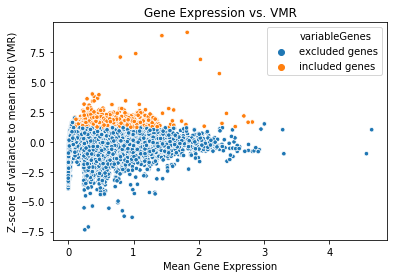

In [13]:
dfVMR['expmean'] = dflogmean # add mean gene expresison data to dataframe
dfVMR['variableGenes']=dfVMR.apply(lambda row: 'included genes' if (row['zScore']>1.2) & (row['expmean']>0.1) & (row['expmean']<3) else 'excluded genes',axis=1)

import seaborn as sns

sns.scatterplot(x = dfVMR['expmean'], y = dfVMR['zScore'],hue = dfVMR['variableGenes'], s = 20)
plt.xlabel('Mean Gene Expression');
plt.ylabel('Z-score of variance to mean ratio (VMR)');
plt.title('Gene Expression vs. VMR');

print('Number of highly variable genes: {}'.format(np.size(dfVMR[dfVMR['variableGenes'] == 'included genes'],0)))

## 2. Principal Component Analysis

We'ce now reduced our features from 15594 genes to the 907 most highly variable genes. However, before clustering the neurons, we will perform one final further feature reduction by doing a Principal Component Analysis (PCA). The purpose of this is to reduce the dimensionality of our data, while losing as little information as possible.

### Preparing for PCA

#### 1. Scale data and make max value = 10

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()
scaler.fit(dfT)
scaled_data_all = scaler.transform(dfT)
scaled_data_all = np.where(scaled_data_all>10,10,scaled_data_all)

#### 2. Extract variable genes for PCA analysis

In [16]:
genestoPCA = scaled_data_all[:,dfVMR['variableGenes'] == 'included genes']

## Perform PCA

Now we will perform a principal componenents analysis using information from the 907 genes that have were identified as highly variable within the dataset. We will use the PCA estimator from sklearn and allow the estimator to deduce the number of principal components that explain 90% of the variance in the dataset (by setting 'n_components' = 0.9).

In [17]:
from sklearn.decomposition import PCA
genes_pca = PCA(n_components = 0.9, svd_solver = 'full')
genes_pca.fit(genestoPCA);
transformed_genesPCA = genes_pca.transform(genestoPCA)
print('Number of principal components that account for 90% of the variance in the dataset: {}'.format(genes_pca.n_components_))

Number of principal components that account for 90% of the variance in the dataset: 128


Our PCA analysis compressed the data from 907 genes to 128 principal components that account for 90% of the variance in the dataset.

### Determine which principal components represent most of the variance in the dataset

In order to determine which principal components represent most of the variance in the dataset (and hence inform which principal components to include as features in subsequent clustering analysis), we will utilize an elbow plot.

#### Draw elbow plot

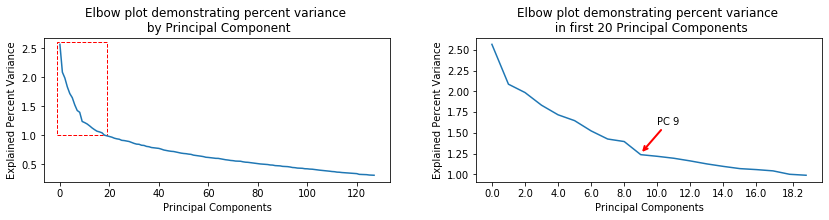

In [18]:
fig = plt.figure()

ax1 = fig.add_axes([0.1, 0.1, 0.8, 0.5]) # left, bottom, width, height (range 0 to 1)
ax1.plot(genes_pca.explained_variance_ratio_*100)
ax1.set_xlabel('Principal Components');
ax1.set_ylabel('Explained Percent Variance');
ax1.set_title('Elbow plot demonstrating percent variance \n by Principal Component')

import matplotlib.patches as mpatches
rect = mpatches.Rectangle(xy = [-1,1.0], width = 20, height = 1.6, facecolor = 'none', edgecolor = 'r', linestyle = '--')
ax1.add_patch(rect)

ax2 = fig.add_axes([1.1, 0.1, 0.8, 0.5]) # left, bottom, width, height (range 0 to 1)
ax2.plot(genes_pca.explained_variance_ratio_[0:20]*100)
ax2.set_xticks([0,2,4,6,8,10,12,14,16,18.20])
ax2.annotate("PC 9", xy=(9, 1.25), xytext=(10, 1.6), arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = 'r', linewidth = 2))

ax2.set_xlabel('Principal Components');
ax2.set_ylabel('Explained Percent Variance');
ax2.set_title('Elbow plot demonstrating percent variance \n in first 20 Principal Components');

The above figures show the percent variance explained by all of the principal components (left) and the top 15 principal components (right; an enlarged image of the red box in the left-hand figure). We can see that principal components up to and including PC 9 hold proportionally more of the variance in the dataset as this is where the 'elbow' is.

## 3. Find clusters in the data (KMeans clustering)

Now we have a reasonable number of features to pass to the clustering algorithm, we will attempt to cluster our dataset. We will use the KMeans clustering alogorithm and the first 9 PCs as features. To determine how many clusters are likely to be in our dataset, we will calculate the distortion cost for k = 1:20 clusters and visually inspect the resulting elbow plot.

#### 1. Scale the principal components

In [19]:
kmean_scaler = StandardScaler()
kmean_scaler.fit(transformed_genesPCA[:,0:9])
kmean_scaled_features = kmean_scaler.transform(transformed_genesPCA[:,0:9])
m = np.size(kmean_scaled_features,0)   # number of samples (neurons) in the dataset

#### 2. Calculate the distortion cost function when the number of clusters is ranged between 1-20.

In [20]:
from sklearn.cluster import KMeans

In [21]:
costJ = np.zeros(20)
clusterNumber = np.zeros(20)

# run a for loop for the KMeans algorithm, increasing the number of clusters by 1 each time

for k in range(0,costJ.size):    
    kmeans = KMeans(n_clusters = k+1,n_init = 100)   # n_init is high to help avoid converging on local minima
    kmeans.fit(kmean_scaled_features)
    costJ[k] = kmeans.inertia_/m     # calculates distortion cost. inertia_ is the sum of squared distances of samples to their closest cluster center.
    clusterNumber[k] = k+1

#### 3. Plot elbow plot for number of clusters vs. distortion cost

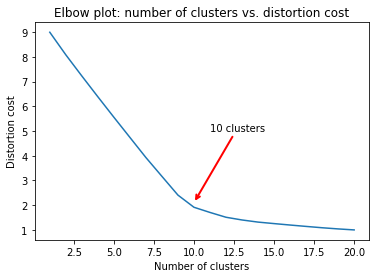

In [22]:
fig = plt.figure()

ax1 = plt.subplot(1,1,1) 
ax1.plot(clusterNumber,costJ)
ax1.set_xlabel('Number of clusters');
ax1.set_ylabel('Distortion cost');
ax1.set_title('Elbow plot: number of clusters vs. distortion cost');
ax1.annotate("10 clusters",  xy=(10, 2.1), xytext=(11, 5.0), arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = 'r', linewidth = 2));

It looks like there are 10 clusters. Let's run the kmeans algorithm with n_clusters = 10 to find labels for each sample cell in our dataset.

In [23]:
kmeans = KMeans(n_clusters = 10,n_init = 100)
kmeans.fit(kmean_scaled_features);

In [24]:
cluster_labels = kmeans.labels_

### t-SNE plot

We can visualise the clusters in 2-dimensional space using a t-SNE (t-distributed Stochastic Neighbor Embedding) plot.   According to the sklearn documentation, *t-SNE converts similarities between data points to joint probabilities and tries to minimize the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data*.

In [25]:
from sklearn.manifold import TSNE

In [26]:
tsne = TSNE(n_components = 2, random_state = 101).fit_transform(transformed_genesPCA[:,0:9])

In [27]:
tsne_df = pd.DataFrame(data = tsne, columns = ('tsne_d1','tsne_d2'))
tsne_df['labels'] = cluster_labels

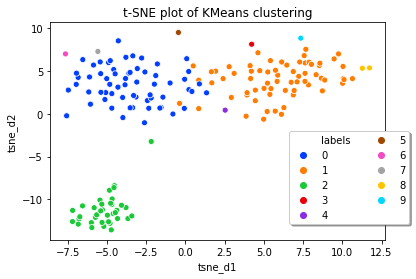

In [28]:
sns.scatterplot(x = tsne_df['tsne_d1'], y = tsne_df['tsne_d2'], hue = tsne_df['labels'], palette = sns.color_palette('bright'), legend = 'full')
plt.legend(loc='lower left', bbox_to_anchor=((0.7), 0.05), ncol=2, fancybox=True, shadow=True);
plt.title('t-SNE plot of KMeans clustering');

Interestingly, it  appears there are 3 major clusters (cluster 0, cluster 1 and cluster 8), together with some clusters containing only a few neurons.It is possible that using an alternative clustering algorithm that we could have got better defined clusters (i.e. without 'outlier' clusters of just one or two neurons) but since there are 3 visually separable clusters which account fo most of the samples in the dataset, we will go ahead and attempt to find marker genes for these larger clusters (i.e clusters containing more than 10 neurons).

## 4. Finding Marker Genes for Clusters

To find marker genes for each cluster, we  utilize the **Wilcoxon Rank Sum test** to compare the differential expression of highly expressed genes in each cluster against all the other clusters.

We will only perform the Wilcoxon Rank Sum test on genes for each cluster that meet the following criteria:

1. The gene must be expressed in at least 10% of the neurons in the cluster
2. There must be a (log-scale) 0.25 fold average difference in expression between the neurons in the cluster vs. the other clusters
3. The gene must be expressed at a higher level in the cluster (on average) than in the other clusters

Genes that are differentially expressed in the cluster (i.e. Wilcoxon rank sum p-value < 0.01) will be considered **marker genes**.


First, we will make a copy of our log-transformed data and label each neuron with the cluster labeles generated by the 
k-means clustering algorithm. We will use this dataframe to calculate the most differentially expressed genes for each cluster

In [29]:
markers_df = dfT.copy()
markers_df['labels'] = cluster_labels
num_cells = markers_df.shape[0]

Next, we will determine the number of neurons in each cluster and find the clusters which comprise over 10 neurons.

In [30]:
cells_per_label = markers_df['labels'].value_counts()
major_clusters = cells_per_label[cells_per_label>10].index.sort_values()

Next, we will use the following function to perform the Wilcoxon Rank Sum test on differentially expressed genes from each of the major clusters. This function returns a dataframe containing the p-values and statistic for genes that were highly differentially expressed in a particular cluster, with the geneID as the index. It takes 2 inputs:

1. markers_df: the log-transformed dataframe with cluster markers 
2. the cluster number of the cluster we are interested in

In [31]:
def find_markers(markers_df,cluster_number):
    markers_df_cluster = markers_df[(markers_df['labels'] == cluster_number)]  # dataframe containing neurons in labelled cluster
    markers_dfelse = markers_df[(markers_df['labels'] != cluster_number)]      # dataframe containing all neurons not in labelled cluster
    
    # select gene if expressed in over 10% neurons (cluster) 
    markers_df_cluster_zero = markers_df_cluster[markers_df_cluster>0].notna().sum() 
    selected_df_cluster = markers_df_cluster_zero[markers_df_cluster_zero>(0.1*num_cells)]
    
       
    # slice dataframes so they now only contain genes that are expressed in over 10% of neurons in the cluster 
    markers_df_cluster_toTest = markers_df_cluster[selected_df_cluster.index]  # or genesToTest if these uncommented
    markers_dfelse_toTest = markers_dfelse[selected_df_cluster.index]
    
    # identify genes that have a 0.25 fold (log-scale) difference in expression between cluster and non-cluster
    data1 = np.log(np.expm1(markers_df_cluster_toTest).mean()+1) 
    data2 = np.log(np.expm1(markers_dfelse_toTest).mean()+1)
    data_diff = data1-data2  
    logfc_threshold_genes = data_diff[(data_diff > 0.25)].index
    
    #slice dataframes so they only contain genes with .25 fold (log-scale) difference in expression between cluster and non-cluster
    thresholded_df_cluster = markers_df_cluster_toTest[logfc_threshold_genes]
    thresholded_dfelse = markers_dfelse_toTest[logfc_threshold_genes]
    
    # create array for p-value and Wilxon statistic
    p = np.zeros(np.size(logfc_threshold_genes))+np.nan
    statistic = np.zeros(np.size(logfc_threshold_genes))+np.nan
    
    # carry out Wilcoxon rank sum test for each gene in the dataframes
    indx = 0
    for i in logfc_threshold_genes:
        statistic[indx], p[indx] = st.ranksums(thresholded_df_cluster[i], thresholded_dfelse[i])
        indx=indx+1
    
    # Put results from Wilcoxon rank sum test in a data frame and select those with a p-value < 0.01 
    wilcoxon_results = pd.DataFrame()
    wilcoxon_results['statistic']= statistic
    wilcoxon_results['p']= p
    wilcoxon_results['logfc_thresholded'] = logfc_threshold_genes
    wilcoxon_results.set_index('logfc_thresholded',inplace = True)
    diff_expressed_genes = wilcoxon_results[wilcoxon_results['p']< 0.01]
     
    return diff_expressed_genes

We can now apply the 'find_markers' function to each of our major clusters to return a dataframe containing only genes that could be used as markers (i.e. where the p-values for the genes indicated that these genes were differentially expressed in the cluster).

In [32]:
cluster0_diff_expressed_genes = find_markers(markers_df,major_clusters[0])
cluster1_diff_expressed_genes = find_markers(markers_df,major_clusters[1])
cluster2_diff_expressed_genes = find_markers(markers_df,major_clusters[2])

## Visualize differentially expressed genes for each cluster

Let's visualize the differentially expressed genes on the **scaled data** (functionally, this has been z-scored). To do so, we'll create a new dataframe from 'scaled_data_all' and assign each neuron its cluster label.

In [33]:
zscore_df = pd.DataFrame(data = scaled_data_all,columns = dfT.columns)
zscore_df['labels'] = cluster_labels

Next, we'll select out only the major clusters

In [34]:
zscore_df = zscore_df[zscore_df['labels'].apply(
                                    lambda label: True if label in major_clusters
                                                        else False)]

Next, we will find the top differentially expressed genes in each cluster using a fucntion. This function takes 4 inputs: 

1. pvalues_df: the differentially expressed genes dataframe returned by the 'find_markers' function for a particular cluster

2. num_diff_genes: how many of the top differentially expressed genes to return

3. markers_df: the z-scored dataframe

4. labels: the cluster labels for the z-scored dataframe

In [35]:
def mtrx_forHeatmap(pvalues_df,num_diff_genes,markers_df,labels):    
    cluster_forHeatmap = pvalues_df.sort_values(['p']).head(num_diff_genes).index
    hMap_cluster_counts = markers_df.copy()[cluster_forHeatmap]
    hMap_cluster_counts['labels']= labels

    hMap_cluster_counts.sort_values('labels', inplace = True)
    hMap_cluster_counts.set_index('labels', inplace = True)
    
    return hMap_cluster_counts

Apply the 'mtrx_forHeatmap' function to find the top 25 differentially expressed genes for each cluster. 

In [36]:
cluster0_hMap = mtrx_forHeatmap(cluster0_diff_expressed_genes,25,zscore_df,zscore_df['labels'])
cluster1_hMap = mtrx_forHeatmap(cluster1_diff_expressed_genes,25,zscore_df,zscore_df['labels'])
cluster2_hMap = mtrx_forHeatmap(cluster2_diff_expressed_genes,25,zscore_df,zscore_df['labels'])

Concatenate the top differentially expressed genes dataframes so they can be plotted on the same heatmap.

### Draw a heatmap showing the most highly expressing genes in each cluster

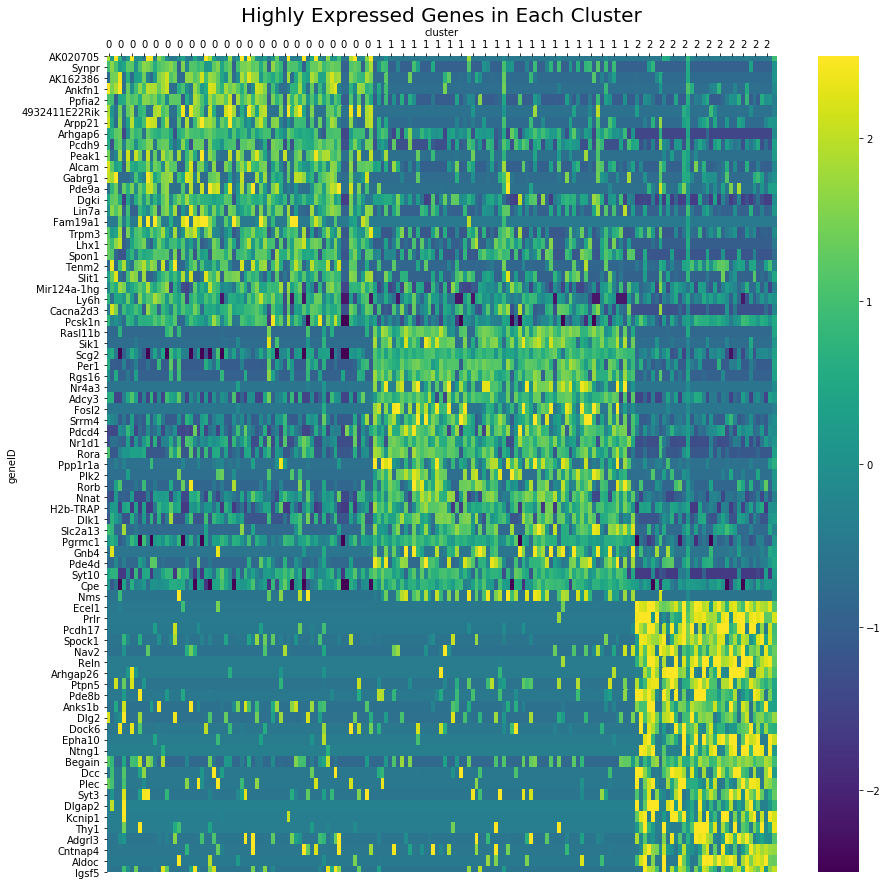

In [37]:
all_cluster_hMap = pd.concat([cluster0_hMap.T,cluster1_hMap.T,cluster2_hMap.T])

fig = plt.figure(figsize=(15,15)); 
ax = sns.heatmap(all_cluster_hMap, cmap = 'viridis', vmin = -2.5, vmax = 2.5, yticklabels=1);
ax.xaxis.set_ticks_position('top');
ax.xaxis.set_label_position('top');
ax.set_title('Highly Expressed Genes in Each Cluster', fontsize = 20);
ax.set_xlabel('cluster');

The above figure shows a heatmap displaying the z-score for all neurons, for the top 25 differentially expressed genes for each cluster. We can see that, as expected, the majority of  neurons that differentially express a particular gene appear to express a high amount of it (the brighter yellow on the heatmap). To further investigate the distribution of expression of the genes in each cluster, we can examine violin plots.

### Draw violin plots to examine the distribution of expression for the top genes in each cluster

We will examine the cluster gene distribution on the log-transformed data. First, we'll select the neurons in the major clusters:

In [38]:
markers1_df = markers_df.copy()
markers1_df = markers1_df[markers1_df['labels'].apply(
                                    lambda label: True if label in major_clusters
                                                        else False)]

Find the top 10 differentially expressed gene for each cluster

In [39]:
cluster0_vPlot = mtrx_forHeatmap(cluster0_diff_expressed_genes,10,markers1_df,markers1_df['labels'])
cluster1_vPlot = mtrx_forHeatmap(cluster1_diff_expressed_genes,10,markers1_df,markers1_df['labels'])
cluster2_vPlot = mtrx_forHeatmap(cluster2_diff_expressed_genes,10,markers1_df,markers1_df['labels'])

The below function will construct a panel of violin plots for the most differentially expresed genes in the specified cluster comparing against the distribution of RNA counts of these genes in the other clusters.

The function take as its input 2 arguments:

1. cluster_vPlot: dataframe of the most differentially expressed genes in a cluster, where each entry in the dataframe is the log-normalized RNA count
2. cluser_marker: the cluster marker label 

In [40]:
def cluster_vln_plots(cluster_vPlot,cluster_marker):
    
    indx = 1
    fig = plt.figure(figsize = (20,5))
    fig.suptitle(('Cluster ' + str(cluster_marker)), fontsize = 24, y = 1.05)

    for i in cluster_vPlot.columns:
        ax = plt.subplot(1,10,indx) 
        ax = sns.violinplot(x = cluster_vPlot.index, y = cluster_vPlot[i], cut = 0, scale = 'count', inner = None);
        ax = sns.swarmplot(x = cluster_vPlot.index, y = cluster_vPlot[i], size = 2, color = 'k')
        ax.set_ylabel('')
        ax.set_xlabel('')
        indx = indx - 1 
        ax.set_title(cluster_vPlot.columns[indx]);
        indx = indx+2
    
    ax = fig.add_subplot(111, frameon=False)
    # hide tick and tick label of the big axes
    plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')

    ax.set_xlabel('clusters', fontsize = 16) # Use argument `labelpad` to move label downwards.
    ax.set_ylabel('cell counts (log-normalized)', fontsize = 16)
   
    plt.tight_layout()

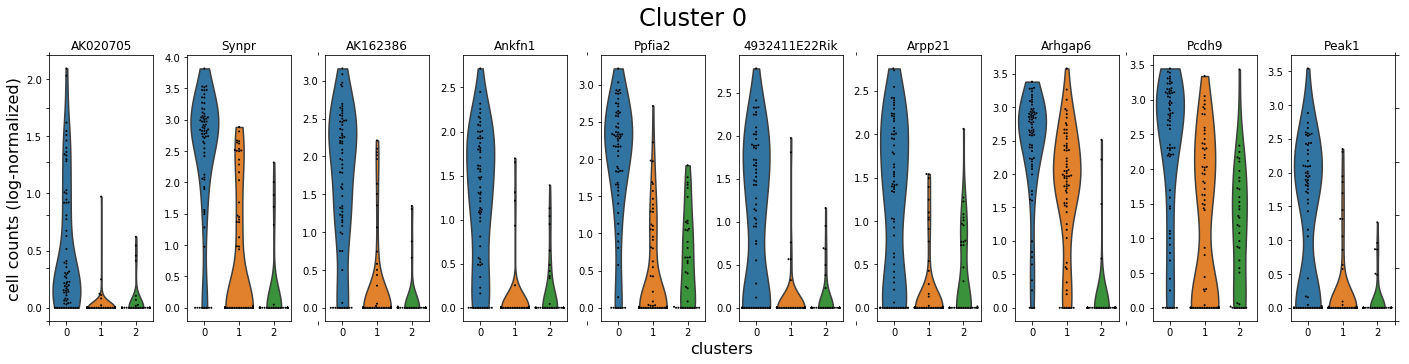

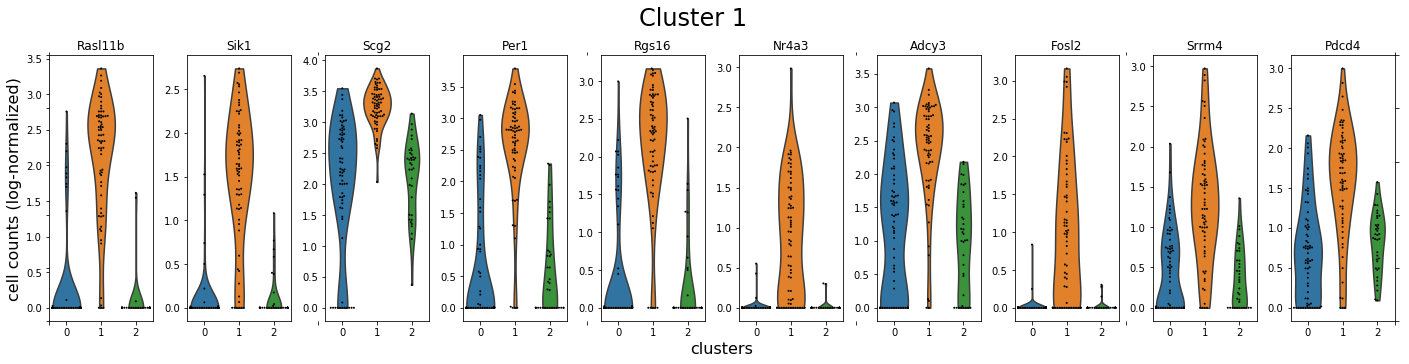

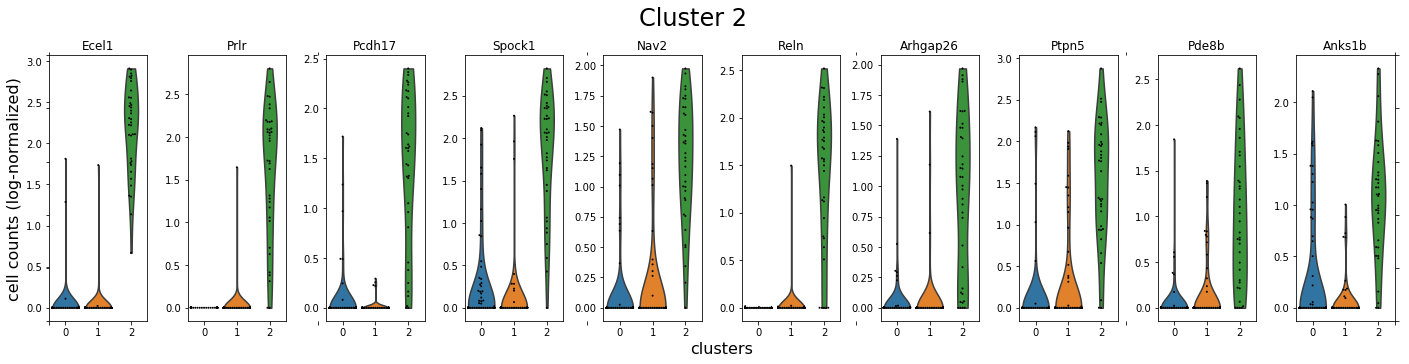

In [41]:
cluster_vln_plots(cluster0_vPlot,major_clusters[0])
cluster_vln_plots(cluster1_vPlot,major_clusters[1])
cluster_vln_plots(cluster2_vPlot,major_clusters[2])

## Summary

The above violin plots show us some interesting candidate marker genes for each cluster as described below:

#### Cluster 0
In cluster 0, the genes for **Synpr** (Synaptoporin), which is involved in transporter activity and **Peak1** (Pseudopodium Enriched Atypical Kinase 1 ), which is a non-receptor tyrosine kinase are both highly differentially expressed. However, it is notable that some neurons in the other clusters also express these genes at a high level, limiting their use as a marker. Additionally, the high expression of these genes do not yield much in the way of clues as to what function these neurons have in the brain.

#### Cluster 1

All of the neurons in this cluster express **Scg2** (secretogranin 2) gene at very high levels. Scg2 is a neuroendocrine secretory protein. It is logical that neurons that release neuropeptides (such as VIP) have high expression of a protein such as this. It also explains why this gene is quite highly expressed in the other clusters (which also both release VIP). This cluster also expresses high levels of the **Fosl2** gene. Fosl2 is expressed at high levels when the neuron has been very active. During the daylight hours (a time when mice are usually asleep), neurons throughout the mouse brain are relatively quiet, with the excpetion of neurons in a few key brain regions. One of these brain regions is an area called the suprachiasmatic nucles (SCN) which resides in the anterior hypothalamus (the brain region in which our VIP neurons wre harvested from). We can therefore conclude that Cluster 2 neurons are lcoated in the SCN. The SCN is a very interesting brain region becuase it controls our circadian rhythms (i.e. the natural 24-hour rhythms of sleeping, eating etc). Additionally, the **Per1** gene, which is also expressed highly in this cluster, codes for a protein that is very important in ensuring that our circadian rhythms maintain a 24-hour cycle.

#### Cluster 2

In cluster 2, it appears that both the **Ecel1** (Endothelin Converting Enzyme Like 1) gene and **Prlr** (prolactin receptor) gene are expressed very highly in this cluster, as compared to the other two cluster. Ecel1 is an endopeptidase that is involved in degrading proteins and so is an important regulator of neuropeptide and peptide hormone activity. Conversely, activation of the prolactin receptor promotes REM sleep in rats, secondary to increasing VIP production in the brain. It was previously unknown which of several VIP neuron populations within the brain were stimulated by prolactin in order to increase VIP production and cause REM sleep. This sequencing data provides evidence to support the hypothesis that the function of neurons in this cluster could be to promote REM sleep.


### Conclusion

Using an unsupervised learning algorithm, we were able to segregate the neurons in our dataset into 3 distinct clusters, based on etheir genetic profile and find some good genetic markers for these clusters. We could extend the project further by looking for subclusters within these clusters. However, we may need a larger dataset to be successful in this endeavor. 